<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/D01_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


# 텐서의 객체
- 타입 : string, float32 ,16 ,int32, 8 등
- 형상(Shape) : 0, 1, 2등의 데이터 차원
- 축(Rank) : 차원의 개수

# 텐서의 차원과 연산

In [3]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2, 3], [6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [6]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


# 난수 생성

In [7]:
rand = tf.random.uniform([1], 0, 1) # shape은 1 // 0부터 1사이 값
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.7790593], shape=(1,), dtype=float32)


In [8]:
rand2 = tf.random.normal([1, 2], 0, 1) # shape은 1, 2 // mean 0, std 1
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[1.961377   0.23777351]], shape=(1, 2), dtype=float32)


In [9]:
rand3 = tf.random.normal(shape=(3, 2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 0.69892627  0.29140544]
 [ 0.57444    -0.48792812]
 [ 0.4026932   0.6614151 ]], shape=(3, 2), dtype=float32)


# 즉시 실행 모드 (Eager Mode) 지원

- 즉시 실행 모드를 통해 텐서플로우를 파이썬처럼 사용 가능

In [10]:
a = tf.constant(3)
b = tf.constant(2)

In [11]:
print(tf.add(a, b))
print(a +b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [12]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [13]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


# 텐서플로우 <-> 넘파이

In [14]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [15]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


# 넘파이처럼 사용하기

In [16]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [17]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [18]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [19]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [20]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [21]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

# 타입 변환

- 연산시 텐서의 ㅌㅏ입을 맞춰줘야함
- 타임 변환에는 tf.cast() 사용

In [22]:
a = tf.constant(2)
print(a)
b = tf.constant(2.)
print(b)

# print(a + b)

# print(b + tf.constant(30., dtype=tf.float64))



tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [23]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(2.)

print(t2 + tf.cast(t, tf.float32))

tf.Tensor(32.0, shape=(), dtype=float32)


# 오토 그래프

- tf가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로, 그래프로 만들어 연산을 진행
- tf.Graph
- 유연성이 있음
 - 모바일 앱, 임베디드 기기, 백앤드 서버와 같이 파이썬 인터프리터가 없는 환경에서 텐서플로우 사용 가능

In [24]:
import timeit

# @tf.function
- 자동으로 그래프를 생성(오토 그래프)
- 그래프로 변환하여 사용 -> GPU연산 가능
- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 떄 사용 가능
- 원본 함수가 필요하다면 (tf.function).python_function()

In [25]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [26]:
def my_function_(x):
    return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [27]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [28]:
tf_my_func.python_function(2)

-13

In [29]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[2.], [3.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [30]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.], [3.]])
    b = tf.constant(4.)
    return inner_function(x, y, b)

outer_function(tf.constant([[1., 2.]])).numpy()

array([[12.]], dtype=float32)

- 텐서플로우가 tf.function으로 변환한 코드

In [31]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 

# 속도 향상

In [32]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('Eager Time : ', timeit.timeit(lambda: eager_model(input_data), number=10000))
print('Graph Time : ', timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager Time :  11.803353189000006
Graph Time :  6.985660926000008


# 변수 생성

- tf.Variable
- 딥러닝 모델 학습시, 그래프 연산이 필요할 때 사용

In [33]:
X = tf.Variable(20.)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


# 자동 미분 (Auto grad)

- tf.GradientTape API사용
- tf.Variable 같은 일부 입력에 대한 기울기 계싼
 - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [34]:
x = tf.Variable(3.)

with tf.GradientTape() as tape:
    y = x**2

In [35]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [36]:
# 한번만 사용될 수 있음
'''
x2 = tf.Variable(4)
dy_dx = tape.gradient(y, x2)
dy_dx.numpy()
'''

'\nx2 = tf.Variable(4)\ndy_dx = tape.gradient(y, x2)\ndy_dx.numpy()\n'

In [37]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x' : x, 'y' : y})

print('dz/dx : ', grad['x'])

print('dz/dy : ', grad['y'])

dz/dx :  tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy :  None


In [38]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[ 1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [39]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [40]:
print(weights.shape)
print(weights)
print(dl_dw.shape)
print(dl_dw)

(3, 2)
<tf.Variable 'weights:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.753355  , -1.0392807 ],
       [-0.84138846, -1.0089391 ],
       [-0.69511276, -0.8215806 ]], dtype=float32)>
(3, 2)
tf.Tensor(
[[ -3.0147603  -5.5219007]
 [ -6.0295205 -11.043801 ]
 [ -9.044281  -16.565702 ]], shape=(3, 2), dtype=float32)


In [41]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[ 4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights.shape)
print(weights)
print(dl_dw.shape)
print(dl_dw)

(3, 2)
<tf.Variable 'weights:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.753355  , -1.0392807 ],
       [-0.84138846, -1.0089391 ],
       [-0.69511276, -0.8215806 ]], dtype=float32)>
(3, 2)
tf.Tensor(
[[ -3.0147603  -5.5219007]
 [ -6.0295205 -11.043801 ]
 [ -9.044281  -16.565702 ]], shape=(3, 2), dtype=float32)


In [42]:
del tape

# 간단한 신경망 구조

## 뉴런

- 입력 -> 연산 -> 활성화함수 -> 출력

In [43]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
    z = x * W + bias
    return sigmoid(z)

In [44]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print('x.shape : ', x.shape)
print('W.shape : ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape :  (1, 2)
W.shape :  (1, 2)
tf.Tensor([[1.4350084  0.45577624]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.46658057 -1.561691  ]], shape=(1, 2), dtype=float32)
[[0.33859828 0.32920527]]


In [45]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print('x.shape : ', x.shape)
print('W.shape : ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape :  (2, 1)
W.shape :  (2, 1)
tf.Tensor(
[[ 0.14798415]
 [-0.47953656]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-2.839014  ]
 [ 0.03354881]], shape=(2, 1), dtype=float32)
[[0.3964859 ]
 [0.49597806]]


In [46]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print('x.shape : ', x.shape)
print('W.shape : ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape :  (1,)
W.shape :  (2, 1)
tf.Tensor([-0.07298891], shape=(1,), dtype=float32)
tf.Tensor(
[[-1.0074911]
 [-1.0811121]], shape=(2, 1), dtype=float32)
[[0.5183757]
 [0.5197171]]


# 퍼셉트론 학습 알고리즘 (가중치 업데이트)

In [47]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y :', y)

[0.53711885]
y : 0


In [48]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W = W + x * 0.1 * error

    if i % 100 == 99 :
        print('{}\t{}\t{}'.format(i + 1, error, output))

100	[-0.10471964]	[0.10471964]
200	[-0.05305783]	[0.05305783]
300	[-0.03516436]	[0.03516436]
400	[-0.02621264]	[0.02621264]
500	[-0.02086494]	[0.02086494]
600	[-0.01731705]	[0.01731705]
700	[-0.01479413]	[0.01479413]
800	[-0.01290939]	[0.01290939]
900	[-0.01144853]	[0.01144853]
1000	[-0.01028337]	[0.01028337]


In [49]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)

In [50]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print('y :', y)

[[0.5265657]]
y : tf.Tensor([1.], shape=(1,), dtype=float32)


In [51]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + x * 0.1 * error

    if i % 100 == 99 :
        print('{}\t{}\t{}'.format(i + 1, error, output))

100	[[0.24653625]]	[[0.75346375]]
200	[[0.15484619]]	[[0.8451538]]
300	[[0.11050522]]	[[0.8894948]]
400	[[0.08518124]]	[[0.91481876]]
500	[[0.06901485]]	[[0.93098515]]
600	[[0.05787337]]	[[0.94212663]]
700	[[0.04975975]]	[[0.95024025]]
800	[[0.04360187]]	[[0.9563981]]
900	[[0.03877628]]	[[0.9612237]]
1000	[[0.03489685]]	[[0.96510315]]


In [52]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros(1 ,1)

y = tf.ones((1,))

print('x\t: {}\nweights\t: {}\nbias\t: {}'.format(x, weights, bias))

x	: [[ 1.1818898   0.4691926  -0.44787258]]
weights	: [[-0.6909905  0.6619264 -1.824755 ]]
bias	: [0.]


In [53]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + x * 0.1 * error
    bias = bias + 1 * 0.1 * error

    if i % 100 == 99 :
        print('{}\t{}\t{}'.format(i + 1, error, output))

100	[[0.03618234]]	[[0.96381766]]
200	[[0.01811558]]	[[0.9818844]]
300	[[0.01204526]]	[[0.98795474]]
400	[[0.00901359]]	[[0.9909864]]
500	[[0.0071981]]	[[0.9928019]]
600	[[0.00599003]]	[[0.99401]]
700	[[0.00512862]]	[[0.9948714]]
800	[[0.0044834]]	[[0.9955166]]
900	[[0.00398225]]	[[0.99601775]]
1000	[[0.00358164]]	[[0.99641836]]


In [54]:
print('x\t: {}\nweights\t: {}\nbias\t: {}'.format(x, weights, bias))

x	: [[ 1.1818898   0.4691926  -0.44787258]]
weights	: [[ 1.5398215  1.5475267 -2.6701136]]
bias	: [[1.887497]]


## AND Gate

In [55]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000) :
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 :
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))   

print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))

Epoch    0	Error Sum [-1.7714577]
Epoch  200	Error Sum [-0.11518604]
Epoch  400	Error Sum [-0.06738862]
Epoch  600	Error Sum [-0.04753133]
Epoch  800	Error Sum [-0.03660433]
Epoch 1000	Error Sum [-0.02970592]
Epoch 1200	Error Sum [-0.02496609]
Epoch 1400	Error Sum [-0.02151313]
Epoch 1600	Error Sum [-0.01888992]
Epoch 1800	Error Sum [-0.01682969]

가중치	: [6.959927 6.963082]
편향	: [-11.619036]


In [56]:
for i in range(4):
    print('X : {} Y : {} Output : {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X : [1 1] Y : [1] Output : [0.90920556]
X : [1 0] Y : [0] Output : [0.00938597]
X : [0 1] Y : [0] Output : [0.00941535]
X : [0 0] Y : [0] Output : [8.993175e-06]


## OR Gate

In [57]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [1], [1], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000) :
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 :
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))   

print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))

Epoch    0	Error Sum [-0.72353166]
Epoch  200	Error Sum [-0.05351117]
Epoch  400	Error Sum [-0.02690801]
Epoch  600	Error Sum [-0.01786394]
Epoch  800	Error Sum [-0.01332148]
Epoch 1000	Error Sum [-0.01060061]
Epoch 1200	Error Sum [-0.00879297]
Epoch 1400	Error Sum [-0.00750742]
Epoch 1600	Error Sum [-0.00654611]
Epoch 1800	Error Sum [-0.00580218]

가중치	: [8.192909 8.189509]
편향	: [-4.629986]


In [58]:
for i in range(4):
    print('X : {} Y : {} Output : {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X : [1 1] Y : [1] Output : [0.99999213]
X : [1 0] Y : [1] Output : [0.97242606]
X : [0 1] Y : [1] Output : [0.97233474]
X : [0 0] Y : [0] Output : [0.00966066]


# XOR Gate

In [59]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000) :
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 :
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))   

print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))

Epoch    0	Error Sum [-1.0238338]
Epoch  200	Error Sum [-0.00921756]
Epoch  400	Error Sum [-0.00037479]
Epoch  600	Error Sum [-1.5377998e-05]
Epoch  800	Error Sum [-9.536743e-07]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279657e-02 -2.0749867e-06]
편향	: [-0.9999969]


In [60]:
for i in range(4):
    print('X : {} Y : {} Output : {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X : [1 1] Y : [0] Output : [0.27914244]
X : [1 0] Y : [1] Output : [0.2791429]
X : [0 1] Y : [1] Output : [0.2689416]
X : [0 0] Y : [0] Output : [0.26894203]


In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

model =  Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                     Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X, Y, epochs=2000, batch_size=1, verbose=0)

In [73]:
model.predict(X)

array([[0.39503163],
       [0.7555952 ],
       [0.7430986 ],
       [0.14384177]], dtype=float32)

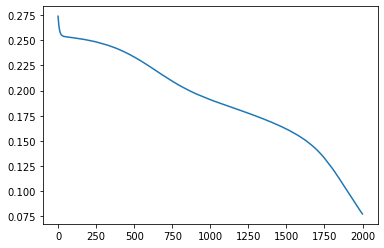

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']);